# Imports

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# 5.1

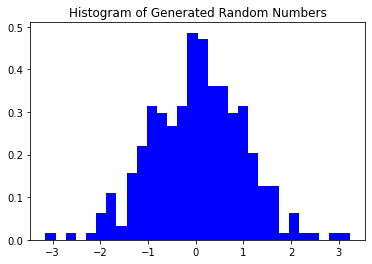

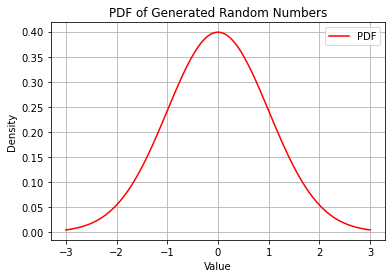

300 samples
Mean = 0.04237121906029649
Variance = 0.9321223665076923


In [32]:
# Generate random numbers
mean = 0
variance = 1
N = 300

std = np.sqrt(variance)
L = np.random.normal(mean,std,N)

# Plot histogram
hist = plt.hist(L, bins=30,density=True, color='b', label="Histogram")
plt.title('Histogram of Generated Random Numbers')
plt.show(hist)

# Plot PDF
xmin, xmax = mean-3*variance, mean+3*variance
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r', label="PDF")

# Add titles and labels
plt.title('PDF of Generated Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.legend()

# Show the plot
plt.show()


print(f"{N} samples")
print(f"Mean = {np.mean(L)}")
print(f"Variance = {np.var(L)}")


# 5.2

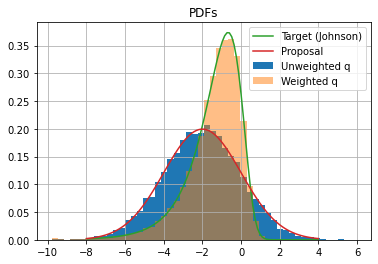

Analytical mean: -1.41
Approximation for mean:    -1.43 (diff = 0.02)

Analytical var:  1.98
Approximation for variance: 1.97 (diff = 0.01)


In [86]:
# Target: Johnson's S_U distribution p(x)
def p(x):
    return np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-.5*(3+2*np.arcsinh(x-1))**2)

# Proposal:
mean = -2
variance = 4
std = np.sqrt(variance)
def q(x):
    return 1/np.sqrt(2*np.pi*std**2)*np.exp(-((x-mean)**2)/(2*std**2))
#def q(x):
#    return np.where((-4 <= x) & (x <= 1), 1/5, 0)

# Number of samples
L = 10000

# Draw from proposal
samples = np.random.normal(mean, std, L)
#samples = samples = np.random.uniform(-4, 1, L)

# Calcluate weights
w = p(samples) / q(samples)

# Plot weighted histogram
plt.figure()
histogram1 = plt.hist(samples,bins=50,density=True,label="Unweighted q")
histogram2 = plt.hist(samples,weights=w,bins=50,alpha=0.5,density=True,label="Weighted q")
plt.legend()
plt.title("Histogram of  proposal")



# Plot the target distribution and the proposal
x = np.linspace(-8,4,100)

plt.plot(x,p(x),label="Target (Johnson)")
plt.plot(x,q(x),label="Proposal")
plt.grid()
plt.title("PDFs")
plt.legend()
plt.show()


# Estimate mean and varaince
analytical_mean = -1.41
analytical_var = 1.98

approx_mean = np.sum(samples*w)/L
approx_var = np.sum(w*(approx_mean-samples)**2)/L

print(f"Analytical mean: {analytical_mean}")
print(f"Approximation for mean:    {np.round(approx_mean,2)} (diff = {np.round(np.abs(analytical_mean-approx_mean),2)})")
print()
print(f"Analytical var:  {analytical_var}")
print(f"Approximation for variance: {np.round(approx_var,2)} (diff = {np.round(np.abs(analytical_var-approx_var),2)})")



The approximation is better when the proposal has about the same density as the target. If we use a wider proposal (higher variance) that overlaps more of the target the weighted histogram looks much better to approximate the target

# 5.4

a) It is a Markov chain since the next point only depends on the previous point and no points before that.

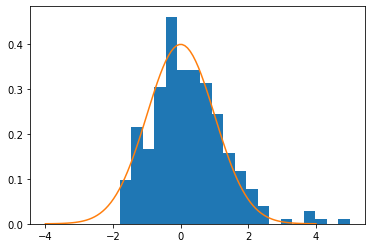

Mean = 0.22534068606420277
Variance = 1.2063054807598268


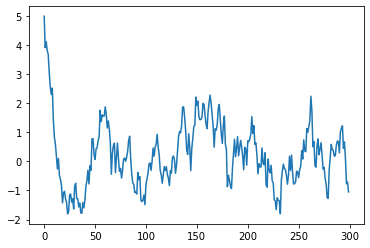

In [102]:
# Setup
K = 300
mean = 0
std_dev = np.sqrt(0.19)

x = np.zeros(K)
x[0] = 5

# Calculate
for k in range(K-1):
    x[k+1] = 0.9*x[k] + np.random.normal(mean, std_dev)
    

# Plot results    
plt.hist(x,bins=20,density=True,label="Histogram of x")

xv = np.linspace(-4,4,100)
plt.plot(xv, 1/np.sqrt(2*np.pi)*np.exp(-.5*xv**2))
plt.show()


print(f"Mean = {np.mean(x)}")
print(f"Variance = {np.var(x)}")

plt.plot(x)
plt.show()



